# Datasets

## Salary

### Read data, sanity checks

In [ ]:
import pandas as pd
salary = pd.read_csv('Salary - Sheet1.csv')

In [ ]:
salary.head()

In [ ]:
salary.shape

In [ ]:
salary.info()

### Data cleaning

In [ ]:
champions_by_year = {
    2010: 'LA Lakers',
    2011: 'Dallas',
    2012: 'Miami',
    2013: 'Miami',
    2014: 'San Antonio',
    2015: 'Golden State',
    2016: 'Cleveland',
    2017: 'Golden State',
    2018: 'Golden State',
    2019: 'Toronto',
    2020: 'LA Lakers',
    2021: 'Milwaukee',
    2022: 'Golden State',
}

In [ ]:
def mark_champion(row):
    if champions_by_year.get(row['Year'])==row['Team']:
        return True
    else:
        return False

In [ ]:
salary['IsChampion'] =salary.apply(mark_champion, axis = 1)

In [ ]:
salary['Salary'] = salary['Salary'].replace('[\$,]', '', regex=True).astype(float)
salary['Projected Next Year'] = salary['Projected Next Year'].replace('[\$,]', '', regex=True).astype(float)

### Create visuals (ALTAIR)

In [ ]:
#ALTAIR PACKAGE
import altair as alt

selector = alt.selection_point(
    name="Year",
    fields=["Year"],
    bind=alt.binding_range(min=2012, max=2022, step=1, name="Select Year"),
    value=2012,
)

base_chart = alt.Chart(salary).mark_bar().encode(
    y=alt.Y('Team:N', sort='-x', axis=alt.Axis(title='Team')),
    x=alt.X('Salary:Q', axis=alt.Axis(title='Amount Spent (USD)')),
    tooltip=['Team:N', 'Year:O', 'Salary:Q', 'Projected Next Year:Q'],
    color=alt.Color('IsChampion:N', legend=alt.Legend(title='Champion')),
).add_selection(
    selector
).transform_filter(
    selector
).properties(
    title='Team Spending by Year',
    background='#f2f2f2'
)



base_chart


In [ ]:
#ALTAIR PACKAGE
import altair as alt

def create_altair_chart(year):
    selector = alt.selection_point(
        name="selector", fields=["Year"], init={"Year": year},
        bind=alt.binding_range(min=2012, max=2022, step=1, name="Select Year")
    )

    base_chart = alt.Chart(salary).mark_bar().encode(
        y=alt.Y('Team:N', sort='-x', axis=alt.Axis(title='Team')),
        x=alt.X('Salary:Q', axis=alt.Axis(title='Amount Spent (USD)')),
        tooltip=['Team:N', 'Year:O', 'Salary:Q', 'Projected Next Year:Q'],
        color=alt.Color('IsChampion:N', legend=alt.Legend(title='Champion')),
    ).add_selection(
        selector
    ).transform_filter(
        selector
    ).properties(
        title='Team Spending by Year',
    background='#f2f2f2'
    )

    annotations_chart = alt.Chart(annotations).mark_text(
        align='left',
        baseline='middle',
        dx=7  # Nudges text to right so it doesn't overlay bars directly
    ).encode(
        y=alt.Y('Team:N', sort='-x'),
        x=alt.X('Salary:Q', stack=None),  # Position based on the Salary value
        text=alt.Text('Salary:Q')  # The text to display
    ).transform_filter(
        selector
    )

    return (base_chart + annotations_chart).to_json()



In [ ]:
chart_dict = base_chart.to_dict()

## Championship

### Read data, sanity checks

In [ ]:
champ = pd.read_csv('Championship.csv') #Double check this on someone else's computer

In [ ]:
champ.head()

In [ ]:
champ.shape

In [ ]:
champ.info()

### Data cleaning

In [ ]:
champ.set_index('Yr')
champ = champ.rename(columns = {'eFG%.1':'DEF eFG%', 'TOV%.1':'DEF TOV%'})
champ = champ.rename(columns = {'Championship':'isChampion'})
champ = champ.set_index('Yr')
champ['DRtg'] = -1 * champ['DRtg']
champ = champ.reset_index()
champ = champ.groupby(['Yr']).apply(lambda x: x.sort_values('Tm'))

In [ ]:
champ

In [ ]:
champions_by_year = {
    2010: 'Los Angeles Lakers',
    2011: 'Dallas Mavericks',
    2012: 'Miami Heat',
    2013: 'Miami Heat',
    2014: 'San Antonio Spurs',
    2015: 'Golden State Warriors',
    2016: 'Cleveland Cavaliers',
    2017: 'Golden State Warriors',
    2018: 'Golden State Warriors',
    2019: 'Toronto Raptors',
    2020: 'Los Angeles Lakers',
    2021: 'Milwaukee Bucks',
    2022: 'Golden State Warriors',
}

def mark_champion(row):
    if champions_by_year.get(row['Yr']) == row['Tm']:
        return True
    else:
        return False

champ['IsChampion'] = champ.apply(mark_champion, axis = 1)

In [ ]:
def assign_color(value):
    return 'red' if value else 'green'

# Create new column 'color' based on 'IsChampion' column
champ['color'] = champ['IsChampion'].apply(lambda x: assign_color(x))

champ

In [ ]:
champ = champ.drop(['color'], axis = 1)

In [ ]:
champ['DEF eFG%'] = -100 * champ['DEF eFG%']
champ['eFG%'] = 100 * champ['eFG%']
champ['DEF TOV%'] = -1 * champ['DEF TOV%']
champ['Tm'] = champ.apply(lambda row: row['Tm'] + ' (Champion)' if row['IsChampion'] else row['Tm'], axis=1)

### Create visuals (MATPLOTLIB, PLOTLY)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, Layout, interact
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def update_plot_rtg(year):
    filtered_df = champ[champ['Yr'] == year]

    plt.barh(filtered_df['Tm'], filtered_df['ORtg'], align='center', alpha=0.9, color='b')
    plt.barh(filtered_df['Tm'], filtered_df['DRtg'], align='center', alpha=0.6, color='y')
    plt.grid()
    plt.title("Defensive Rating vs. Offensive Rating")
    plt.ylabel("Team")
    plt.xlabel("Rating")
    plt.show()

# Add a slider for selecting the year
year_slider = widgets.IntSlider(min=champ['Yr'].min(), max=champ['Yr'].max(), step=1, value=champ['Yr'].min())

# Link the slider to the update function
interact(update_plot_rtg, year=year_slider)

# Display the slider
plt.show()

In [ ]:
# Assume df is already defined and includes 'Yr', 'Tm', 'ORtg', and 'DRtg'

def update_plot_rtg(year):
    filtered_df = champ[champ['Yr'] == year]
    
    # Create a bar chart with Plotly
    fig = go.Figure()
    fig.add_trace(go.Bar(
        y=filtered_df['Tm'],
        x=filtered_df['ORtg'],
        name='Offensive Rating',
        orientation='h',
        marker=dict(color='blue', opacity=0.9)
    ))
    fig.add_trace(go.Bar(
        y=filtered_df['Tm'],
        x=filtered_df['DRtg'],
        name='Defensive Rating',
        orientation='h',
        marker=dict(color='yellow', opacity=0.6)
    ))

    fig.update_layout(
        title="Defensive Rating vs. Offensive Rating",
        xaxis_title="Rating",
        yaxis_title="Team",
        barmode='overlay'
    )
    return fig


In [ ]:
def update_plot_efg(year):
    filtered_df =champ[champ['Yr'] == year]

    plt.barh(filtered_df['Tm'], filtered_df['eFG%'], align='center', alpha=0.9, color='c')
    plt.barh(filtered_df['Tm'], filtered_df['DEF eFG%'], align='center', alpha=0.6, color='m')
    plt.grid()
    plt.title("Defensive Effective FG% vs. Effective FG%")
    plt.ylabel("Team")
    plt.xlabel("Percent")
    plt.show()

# Add a slider for selecting the year
year_slider = widgets.IntSlider(min=champ['Yr'].min(), max=champ['Yr'].max(), step=1, value=champ['Yr'].min())

# Link the slider to the update function
interact(update_plot_efg, year=year_slider)

# Display the slider
plt.show()

In [ ]:
def update_plot_tov(year):
    filtered_df = champ[champ['Yr'] == year]

    plt.barh(filtered_df['Tm'], filtered_df['TOV%'], align='center', alpha=0.9, color='g')
    plt.barh(filtered_df['Tm'], filtered_df['DEF TOV%'], align='center', alpha=0.6, color='r')
    plt.grid()
    plt.title("Defensive Turnover% vs. Turnover%")
    plt.ylabel("Team")
    plt.xlabel("Percent")
    plt.show()

# Add a slider for selecting the year
year_slider = widgets.IntSlider(min=champ['Yr'].min(), max=champ['Yr'].max(), step=1, value=champ['Yr'].min())

# Link the slider to the update function
interact(update_plot_tov, year=year_slider)

# Display the slider
plt.show()

In [ ]:
# Function to create interactive plot
def interact_with_plot_tov(year):
    interact(update_plot_tov, year=year_slider, sin_checked=sin_checkbox)

# Function to create interactive plot
def interact_with_plot_efg(year):
    interact(update_plot_efg, year=year_slider, cos_checked=cos_checkbox)

# Function to create interactive plot
def interact_with_plot_rtg(year):
    interact(update_plot_rtg, year=year_slider, tan_checked=tan_checkbox)

# Add a slider for selecting the year
year_slider = widgets.IntSlider(min=champ['Yr'].min(), max=champ['Yr'].max(), step=1, value=champ['Yr'].min())

# Define checkboxes for each plot
sin_checkbox = widgets.Checkbox(value=False, description='Turnover% vs. DEF TOV%')
cos_checkbox = widgets.Checkbox(value=False, description='eFG% vs. DEF eFG%')
tan_checkbox = widgets.Checkbox(value=False, description='ORtg vs. DRtg')

# Link the slider and checkboxes to the update functions
interact_with_plot_tov(year_slider)
interact_with_plot_efg(year_slider)
interact_with_plot_rtg(year_slider)

In [ ]:
interact_with_plot_tov(year_slider)
interact_with_plot_efg(year_slider)
interact_with_plot_rtg(year_slider)

## Injuries

### Read data, sanity checks

In [ ]:
inj = pd.read_csv('nba_injuries.csv')

### Data cleaning

In [ ]:
inj['Date'] = pd.to_datetime(inj['Date'])
inj['Month'] = inj['Date'].dt.month
inj['Year'] = inj['Date'].dt.year
inj.loc[inj['Month'] > 6, 'Year'] += 1
inj = inj[(inj['Year'] >= 2012) & (inj['Year'] <= 2022)]

In [ ]:
acquired_df = inj[inj['Acquired'].notnull()]
relinquished_df = inj[inj['Relinquished'].notnull()]

# Group by year and team, then calculate cumulative count for 'Acquired' and 'Relinquished' events
acquired_counts = acquired_df.groupby(['Year', 'Team']).cumcount() + 1
relinquished_counts = relinquished_df.groupby(['Year', 'Team']).cumcount() + 1

# Assign the cumulative counts to new columns
inj['Acquired_Count'] = acquired_counts
inj['Relinquished_Count'] = relinquished_counts

In [ ]:
inj[['Acquired_Count', 'Relinquished_Count']] = inj[['Acquired_Count', 'Relinquished_Count']].fillna(0)
inj = inj[['Team', 'Year','Acquired_Count','Relinquished_Count','Month']]

In [ ]:
dropping_df_acq = inj.copy()
dropping_df_acq=dropping_df_acq[['Team','Year','Acquired_Count']]
dropping_df_acq = dropping_df_acq[dropping_df_acq['Acquired_Count'] > 0]
dropping_df_acq=dropping_df_acq.groupby(['Team', 'Year'])['Acquired_Count'].last().reset_index()
dropping_df_acq = dropping_df_acq[dropping_df_acq['Team'] != 'Bullets']

In [ ]:
dropping_df_req = inj.copy()
dropping_df_req=dropping_df_req[['Team','Year','Relinquished_Count']]
dropping_df_req = dropping_df_req[dropping_df_req['Relinquished_Count'] > 0]
dropping_df_req=dropping_df_req.groupby(['Team', 'Year'])['Relinquished_Count'].last().reset_index()
dropping_df_req = dropping_df_req[dropping_df_req['Team'] != 'Bullets']

In [ ]:
merged_df_inj = pd.merge(dropping_df_acq, dropping_df_req, on=['Team', 'Year'], suffixes=('_acquired', '_relinquished'))

In [ ]:
champions_by_year = {
    2010: 'Lakers',
    2011: 'Mavericks',
    2012: 'Heat',
    2013: 'Heat',
    2014: 'Spurs',
    2015: 'Warriors',
    2016: 'Cavaliers',
    2017: 'Warriors',
    2018: 'Warriors',
    2019: 'Raptors',
    2020: 'Lakers',
    2021: 'Bucks',
    2022: 'Warriors',
}
def mark_champion_2(row):
    if champions_by_year.get(row['Year']) == row['Team']:
        return True
    else:
        return False
merged_df_inj['IsChampion'] = merged_df_inj.apply(mark_champion_2, axis = 1)    

### Create visuals (PLOTLY EXPRESS)

In [ ]:
import plotly.express as px
fig4 = px.scatter(merged_df_inj, 
                  x="Acquired_Count", y="Relinquished_Count", 
                  animation_frame="Year", animation_group="Team", 
                  color='IsChampion', hover_name="Team", symbol='IsChampion',
                  size_max=100,color_discrete_map={True: 'orange', False: 'blue'}) 

# Update x-axis and y-axis labels
fig4.update_xaxes(title_text="Acquired Count")
fig4.update_yaxes(title_text="Relinquished Count")
fig4.update_layout(title="Acquired and Relinquished Count over Years",
                          # Update the legend title here
                          plot_bgcolor='#f2f2f2',  # Set plot background color
                          paper_bgcolor='#f2f2f2')



fig4.show()

## WinShares

### Read data, sanity checks

In [ ]:
winshares = pd.read_csv('./WinShares.csv', header=0)

In [ ]:
winshares

In [ ]:
champions_by_year = {
    2010: 'LAL',
    2011: 'Dal',
    2012: 'Mia',
    2013: 'Mia',
    2014: 'SAS',
    2015: 'GSW',
    2016: 'CLE',
    2017: 'GSW',
    2018: 'GSW',
    2019: 'TOR',
    2020: 'LAL',
    2021: 'MIL',
    2022: 'GSW',
}

def mark_champion(row):
    if champions_by_year.get(row['Year']) == row['Tm']:
        return True
    else:
        return False

winshares['IsChampion'] = winshares.apply(mark_champion, axis = 1)

### Data Cleaning

In [ ]:
winshares = winshares.dropna()

### Create visuals

In [ ]:
winshares.head()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load your dataset
data = winshares
# Group by team to calculate mean PER and sum WS
team_data = data.groupby('Tm').agg({'PER': 'mean', 'WS': 'sum'}).reset_index()

# Initialize the scatter plot for teams
fig = go.Figure()
years = data['Year'].unique()
years.sort()

for year in years:
    year_data = data[data['Year'] == year]
    for team in year_data['Tm'].unique():
        team_data = year_data[year_data['Tm'] == team]
        fig.add_trace(
            go.Scatter(
                x=team_data['PER'],
                y=team_data['WS'],
                mode='markers',
                opacity=0.6,
                marker=dict(size=10),
                name=f'{team} {year}',
                visible=(year == years[0]),
                customdata=team_data['Player'],
                hoverinfo='text+x+y',
                text=team_data['Player'],
            )
        )
# Create steps for each year in the slider
steps = []
for i, year in enumerate(years):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"Interactive Scatter Plot of Player PER vs. Win Share: {year}"}],
        label=str(year)
    )
    for j in range(len(years)):
        if years[j] == year:
            start, end = len(years) * j, len(years) * (j + 1)
            step["args"][0]["visible"][start:end] = [True] * (end - start)
    steps.append(step)

# Create the slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

# Update the layout to add the slider
fig.update_layout(
    sliders=sliders,
    title=f'Interactive Scatter Plot of Player PER vs. Win Share: {years[0]}',
    xaxis_title='PER',
    yaxis_title='Win Shares',
    hovermode='closest'
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Initialize the scatter plot
fig = go.Figure()

# Unique years for the slider
years = data['Year'].unique()
years.sort()

# Function to add team scatter traces
def add_team_traces(year_data, visible=False):
    # Calculate average PER and sum WS for each team
    team_summary = year_data.groupby('Tm').agg({'PER': 'mean', 'WS': 'sum'}).reset_index()
    fig.add_trace(
        go.Scatter(
            x=team_summary['PER'],
            y=team_summary['WS'],
            mode='markers',
            marker=dict(size=10),
            name=f'Team Data {year_data["Year"].iloc[0]}',
            text=team_summary['Tm'],
            customdata=team_summary['Tm'],
            hoverinfo='text+x+y',
            visible=visible
        )
    )

# Add initial traces for all years, but make only the first year visible
for year in years:
    year_data = data[data['Year'] == year]
    visible = (year == years[0])
    add_team_traces(year_data, visible=visible)

# Update function for clicks to split team data into player data
def update_point(trace, points, selector):
    with fig.batch_update():
        tm = points.customdata[0]
        year = trace.name.split()[-1]  # Extract the year from the trace name
        team_players = data[(data['Tm'] == tm) & (data['Year'] == int(year))]
        # Clear any existing player traces and add new ones
        for t in fig.data[1:]:
            fig.data = fig.data[:-1]
        fig.add_trace(go.Scatter(
            x=team_players['PER'],
            y=team_players['WS'],
            mode='markers+text',
            marker=dict(color='red', size=7),
            text=team_players['Player'],
            name='Players',
            hoverinfo='text+x+y'
        ))
        # Grey out other teams
        colors = ['lightgrey' if t != tm else 'blue' for t in trace.text]
        trace.marker.color = colors

# Set click event handler for each team trace
for t in fig.data:
    t.on_click(update_point)

# Create steps for the slider
steps = []
for i, year in enumerate(years):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"Interactive Scatter Plot of Team PER vs. Win Share: {year}"}],
        label=str(year)
    )
    step["args"][0]["visible"][i] = True  # Only the trace for this year becomes visible
    steps.append(step)

# Create the slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

# Update the layout to add the slider and set a more comprehensive title
fig.update_layout(
    sliders=sliders,
    title=f'Interactive Scatter Plot of Team and Player PER vs. Win Share',
    xaxis_title='PER',
    yaxis_title='Win Shares',
    hovermode='closest'
)

fig.show()


## GDP

### Read data, sanity checks

In [ ]:
import numpy as np
gdp = pd.read_csv('./gdp_by_county.csv')

### Data cleaning

In [ ]:
gdp = gdp[~gdp['LineCode'].isnull()]

In [ ]:
def get_county(array):
  return array[0]

def get_state(array):
  return array[1].lstrip()

In [ ]:
cleaned_gdp_2 = gdp['GeoName'].str.split(',')
cleaned_gdp_3 = cleaned_gdp_2[cleaned_gdp_2.notnull()]
counties = cleaned_gdp_3.apply(get_county)
gdp['county'] = counties
state_ids = cleaned_gdp_2.apply(get_state)
gdp['state_id'] = state_ids

In [ ]:
#only look at NBA counties
nba_county_list = [
    'Fulton',
    'Suffolk',
    'Kings',
    'Mecklenburg',
    'Cook',
    'Cuyahoga',
    'Dallas',
    'Denver',
    'Wayne',
    'San Francisco',
    'Harris',
    'Marion',
    'Los Angeles',
    'Shelby',
    'Miami-Dade',
    'Milwaukee',
    'Hennepin',
    'Orleans',
    'New York',
    'Oklahoma',
    'Orange',
    'Philadelphia',
    'Maricopa',
    'Multnomah',
    'Sacramento',
    'Bexar',
    'Toronto',
    'Salt Lake',
    'Washington D.C.'
]

county_to_state = {
    'Fulton': 'GA',
    'Suffolk': 'MA',
    'Kings': 'NY',
    'Mecklenburg': 'NC',
    'Cook': 'IL',
    'Cuyahoga': 'OH',
    'Dallas': 'TX',
    'Denver': 'CO',
    'Wayne': 'MI',
    'San Francisco': 'CA',
    'Harris': 'TX',
    'Marion': 'IN',
    'Los Angeles': 'CA',
    'Shelby': 'TN',
    'Miami-Dade': 'FL',
    'Milwaukee': 'WI',
    'Hennepin': 'MN',
    'Orleans': 'LA',  # Note: Louisiana has parishes instead of counties
    'New York': 'NY',
    'Oklahoma': 'OK',
    'Orange': 'FL',
    'Philadelphia': 'PA',
    'Maricopa': 'AZ',
    'Multnomah': 'OR',
    'Sacramento': 'CA',
    'Bexar': 'TX',
    'Toronto': 'Ontario',  # Special case: Toronto is in Canada
    'Salt Lake': 'UT',
    'Washington D.C.': 'N/A'  # Special case: Washington D.C. is not in a state
}

# Create a list of correct city-state combinations based on the NBA list and the mapping
correct_county_state_combos = [county + ', ' + county_to_state[county] for county in nba_county_list]

# Filter the merged_df based on the correct city-state combinations
nba_gdp = gdp[gdp['GeoName'].isin(correct_county_state_combos)]


nba_gdp.head(3)

In [ ]:
# df = gdp[~gdp['GeoName'].isin(correct_county_state_combos)]
df = gdp

population_df = df[df['Description'].str.contains('Population')]
#Filter population down?
personal_income_df = df[df['Description'].str.contains('Personal income') & ~df['Description'].str.contains('Per capita')]
#Filter personal income down?
gdp_per_capita_df = df[df['Description'].str.contains('Per capita personal income')]
#Filter gdp down?

# Step 2: Pivot these filtered DataFrames to have years as rows
# For Population
population_pivot = population_df.melt(id_vars=['GeoFips', 'GeoName','county','state_id'], value_vars=population_df.columns[4:-1], var_name='Year', value_name='Population')
population_pivot['Year'] = population_pivot['Year'].astype(int)  # Convert Year to integer
population_pivot.replace('(NA)', np.nan, inplace=True)
population_pivot = population_pivot.dropna()
population_pivot['Population'] = population_pivot['Population'].astype(int)  # Convert Population to integer

# # For Personal Income
personal_income_pivot = personal_income_df.melt(id_vars=['GeoFips', 'GeoName','county','state_id'], value_vars=personal_income_df.columns[4:-1], var_name='Year', value_name='Personal Income')
personal_income_pivot['Year'] = personal_income_pivot['Year'].astype(int)  # Convert Year to integer
personal_income_pivot.replace('(NA)', np.nan, inplace=True)
personal_income_pivot = personal_income_pivot.dropna()
personal_income_pivot['Personal Income'] = personal_income_pivot['Personal Income'].astype(int)  # Convert Personal Income to integer

# # For GDP Per Capita
gdp_per_capita_pivot = gdp_per_capita_df.melt(id_vars=['GeoFips', 'GeoName','county','state_id'], value_vars=gdp_per_capita_df.columns[4:-1], var_name='Year', value_name='GDP Per Capita')
gdp_per_capita_pivot['Year'] = gdp_per_capita_pivot['Year'].astype(int)  # Convert Year to integer
gdp_per_capita_pivot.replace('(NA)', np.nan, inplace=True)
gdp_per_capita_pivot = gdp_per_capita_pivot.dropna()
gdp_per_capita_pivot['GDP Per Capita'] = gdp_per_capita_pivot['GDP Per Capita'].astype(int)  # Convert GDP per capita to integer


In [ ]:
nba_df = nba_gdp
nba_population_df = nba_df[nba_df['Description'].str.contains('Population')]
nba_personal_income_df = nba_df[nba_df['Description'].str.contains('Personal income') & ~nba_df['Description'].str.contains('Per capita')]
nba_gdp_per_capita_df = nba_df[nba_df['Description'].str.contains('Per capita personal income')]

# Step 2: Pivot these filtered DataFrames to have years as rows
# For Population
nba_population_pivot = nba_population_df.melt(id_vars=['GeoFips','GeoName','county','state_id'], value_vars=nba_population_df.columns[4:-1], var_name='Year', value_name='Population')
nba_population_pivot['Year'] = nba_population_pivot['Year'].astype(int)  # Convert Year to integer
nba_population_pivot.replace('(NA)', np.nan, inplace=True)
nba_population_pivot = nba_population_pivot.dropna()
nba_population_pivot['Population'] = nba_population_pivot['Population'].astype(int)  # Convert Population to integer

# # For Personal Income
nba_personal_income_pivot = nba_personal_income_df.melt(id_vars=['GeoFips','GeoName','county','state_id'], value_vars=nba_personal_income_df.columns[4:-1], var_name='Year', value_name='Personal Income')
nba_personal_income_pivot['Year'] = nba_personal_income_pivot['Year'].astype(int)  # Convert Year to integer
nba_personal_income_pivot.replace('(NA)', np.nan, inplace=True)
nba_personal_income_pivot = nba_personal_income_pivot.dropna()
nba_personal_income_pivot['Personal Income'] = nba_personal_income_pivot['Personal Income'].astype(int)  # Convert Personal Income to integer

# # For GDP Per Capita
nba_gdp_per_capita_pivot = nba_gdp_per_capita_df.melt(id_vars=['GeoFips','GeoName','county','state_id'], value_vars=nba_gdp_per_capita_df.columns[4:-1], var_name='Year', value_name='GDP Per Capita')
nba_gdp_per_capita_pivot['Year'] = nba_gdp_per_capita_pivot['Year'].astype(int)  # Convert Year to integer
nba_gdp_per_capita_pivot.replace('(NA)', np.nan, inplace=True)
nba_gdp_per_capita_pivot = nba_gdp_per_capita_pivot.dropna()
nba_gdp_per_capita_pivot['GDP Per Capita'] = nba_gdp_per_capita_pivot['GDP Per Capita'].astype(int)  # Convert GDP per capita to integer


In [ ]:
nba_population_pivot.groupby(by='Year')['Population'].mean()
nba_gdp_per_capita_pivot.groupby(by='Year')['GDP Per Capita'].mean()
nba_personal_income_pivot.groupby(by='Year')['Personal Income'].mean()

In [ ]:
population_pivot.groupby(by='Year')['Population'].mean()
gdp_per_capita_pivot.groupby(by='Year')['GDP Per Capita'].mean()
personal_income_pivot.groupby(by='Year')['Personal Income'].mean()

In [ ]:
champions_by_year = {
    2010: 'Los Angeles',
    2011: 'Dallas',
    2012: 'Miami-Dade',
    2013: 'Miami-Dade',
    2014: 'Bexar',
    2015: 'San Francisco',
    2016: 'Cuyahoga',
    2017: 'San Francisco',
    2018: 'San Francisco',
    2019: 'Toronto',  # As before, Toronto does not have counties.
    2020: 'Los Angeles',
    2021: 'Milwaukee',
    2022: 'San Francisco',
}

In [ ]:
def mark_champion(row):
    if champions_by_year.get(row['Year']) == row['county']:
        return True
    else:
        return False

In [ ]:
gdp_per_capita_pivot['IsChampion'] = gdp_per_capita_pivot.apply(mark_champion, axis = 1)
personal_income_pivot['IsChampion'] = personal_income_pivot.apply(mark_champion, axis = 1)
population_pivot['IsChampion'] = population_pivot.apply(mark_champion, axis = 1)
nba_gdp_per_capita_pivot['IsChampion'] = nba_gdp_per_capita_pivot.apply(mark_champion, axis = 1)
nba_personal_income_pivot['IsChampion'] = nba_personal_income_pivot.apply(mark_champion, axis = 1)
nba_population_pivot['IsChampion'] = nba_population_pivot.apply(mark_champion, axis = 1)

In [ ]:
def mark_nba(row):
    if row['GeoName'] in(correct_county_state_combos):
        return True
    else:
        return False

In [ ]:
gdp_per_capita_pivot['IsNBA'] = gdp_per_capita_pivot.apply(mark_nba, axis = 1)
personal_income_pivot['IsNBA'] = personal_income_pivot.apply(mark_nba, axis = 1)
population_pivot['IsNBA'] = population_pivot.apply(mark_nba, axis = 1)

In [ ]:
gdp_per_capita_pivot[gdp_per_capita_pivot['IsNBA']==True]

In [ ]:
#Mean GDP growth for all counties over 750,000
filtered_pop = population_pivot[population_pivot['Population']>=821725]
#Mean GDP growth for all NBA counties
#Mean GDP growth for winning NBA counties

filtered_pop

In [ ]:
merge_df = filtered_pop.merge(gdp_per_capita_pivot, how='left', on=['GeoFips','GeoName','county','state_id','Year'])
merge_df = merge_df[['GeoFips','GeoName','county','state_id','Year','Population','IsChampion_x','IsNBA_x','GDP Per Capita']]
merge_df = merge_df.merge(personal_income_pivot, how='left',on=['GeoFips','GeoName','county','state_id','Year'])
merge_df = merge_df[['GeoFips','GeoName','county','state_id','Year','Population','Personal Income','GDP Per Capita','IsChampion','IsNBA',]]


In [ ]:
gdp_df_sorted = merge_df.sort_values(by=['county', 'Year'], ascending=[True, False])

# Calculate the year-over-year percentage growth for each metric
gdp_df_sorted['GDP Per Capita Growth'] = gdp_df_sorted.groupby('county')['GDP Per Capita'].pct_change(-1)
gdp_df_sorted['Population Growth'] = gdp_df_sorted.groupby('county')['Population'].pct_change(-1)
gdp_df_sorted['Personal Income Growth'] = gdp_df_sorted.groupby('county')['Personal Income'].pct_change(-1)

# Fill NaN values for the first year of data for each county with 0%
gdp_df_sorted['GDP Per Capita Growth'].fillna(0, inplace=True)
gdp_df_sorted['Population Growth'].fillna(0, inplace=True)
gdp_df_sorted['Personal Income Growth'].fillna(0, inplace=True)

In [ ]:
gdp_df_sorted['Percent pop diff from dataset mean'] = gdp_df_sorted['Population']/gdp_df_sorted['Population'].mean()
gdp_df_sorted['Percent gdp diff from dataset mean'] = gdp_df_sorted['GDP Per Capita']/gdp_df_sorted['GDP Per Capita'].mean()
gdp_df_sorted['Percent personal income diff from dataset mean'] = gdp_df_sorted['Personal Income']/gdp_df_sorted['Personal Income'].mean()
gdp_df_sorted['Percent pop diff from nba mean'] = gdp_df_sorted[gdp_df_sorted['IsNBA']==True]['Population']/gdp_df_sorted[gdp_df_sorted['IsNBA']==True]['Population'].mean()
gdp_df_sorted['Percent gdp diff from nba mean'] = gdp_df_sorted[gdp_df_sorted['IsNBA']==True]['GDP Per Capita']/gdp_df_sorted[gdp_df_sorted['IsNBA']==True]['GDP Per Capita'].mean()
gdp_df_sorted['Percent personal income diff from nba mean'] = gdp_df_sorted[gdp_df_sorted['IsNBA']==True]['Personal Income']/gdp_df_sorted[gdp_df_sorted['IsNBA']==True]['Personal Income'].mean()
gdp_df_sorted.sort_values(by='Percent pop diff from dataset mean', ascending = False)

In [ ]:
gdp = gdp_df_sorted

### Create visuals (PLOTLY PX)

In [ ]:
fig = px.bar(gdp, x='IsNBA',y='GDP Per Capita', color = 'county')

# Plotly Dash

In [ ]:
import dash
from dash import html, dcc
import plotly.express as px
from dash_vega_components import Vega

In [ ]:
app = dash.Dash(__name__)

In [ ]:
salary

In [ ]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

In [ ]:
champions_by_year = {
    2010: 'LAL',
    2011: 'DAl',
    2012: 'MIA',
    2013: 'MIA',
    2014: 'SAS',
    2015: 'GSW',
    2016: 'CLE',
    2017: 'GSW',
    2018: 'GSW',
    2019: 'TOR',
    2020: 'LAL',
    2021: 'MIL',
    2022: 'GSW',
}
def mark_champion(row):
    if champions_by_year.get(row['Year']) == row['Tm']:
        return True
    else:
        return False

In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, html, dcc, Input, Output, State

# Read data
df = pd.read_csv('./WinShares.csv')

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div(children=[
    html.H1(children='What Drives Success in the NBA', style={'textAlign': 'center'}),
    html.Hr(),
    html.Div(children=[
        html.H3("Salary Chart"),
        html.P('Total Amount of USD Spent on Roster Construction per NBA season.'),
        Vega(id='salary-chart', spec=chart_dict),
        html.Hr(),
        html.Hr(),
        html.H3("Injuries Chart"),
        dcc.Graph(id='injuries-chart'),
        html.Hr(),
        html.Div(children=[
            html.Label("Select Year:"),
            
            dcc.Slider(
                id='year-slider1',
                min=df['Year'].min(),
                max=df['Year'].max(),
                value=df['Year'].min(),
                marks={str(year): str(year) for year in df['Year'].unique()},
                step=None
            ),
        ]),
        html.Hr(),
        html.H3("Interactive Statistics Graph"),
        html.Div(children=[
            html.Div(children=[
                html.Label("Select Stats:"),
                dcc.Dropdown(
                    options=[
                        {'label': 'Age', 'value': 'Age'},
                        {'label': 'PER', 'value': 'PER'},
                        {'label': 'TS%', 'value': 'TS%'},
                        {'label': 'TRB%', 'value': 'TRB%'},
                        {'label': 'AST%', 'value': 'AST%'},
                        {'label': 'STL%', 'value': 'STL%'},
                        {'label': 'BLK%', 'value': 'BLK%'},
                        {'label': 'TOV%', 'value': 'TOV%'},
                        {'label': 'USG%', 'value': 'USG%'},
                        {'label': 'WS', 'value': 'WS'},
                        {'label': 'BPM', 'value': 'BPM'}
                    ],
                    value=['Age', 'PER'],
                    id='controls-and-dropdown',
                    multi=True
                ),
            ], style={'width': '48%', 'display': 'inline-block'}),
            html.Div(children=[
                html.Label("Select Team:"),
                dcc.Dropdown(
                    options=[{'label': team, 'value': team} for team in df['Tm'].unique()],
                    value=None,
                    id='team-dropdown'
                ),
            ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
            dcc.Graph(figure={}, id='controls-and-graph'),
        ]),
        html.Div(children=[
            html.Button('Switch to Team View', id='switch-button', n_clicks=0),
        ]),
        html.Hr(),
        html.Div(children=[
            html.Label("Select Year:"),
            
            dcc.Slider(
                id='year-slider',
                min=df['Year'].min(),
                max=df['Year'].max(),
                value=df['Year'].min(),
                marks={str(year): str(year) for year in df['Year'].unique()},
                step=None
            ),
        ]),
        html.Hr(),
        html.Div(children=[
            html.H3("Playoff Mirrored Statistics Chart"),
            html.P("'Overall Rating': How many points they score/allow over 100 possessions"),
            html.P("'Turnover %': Percentage of turnovers forced/performed"),
            html.P("'FG%': Percentage of Field Goals allowed/made"),
            dcc.Graph(id='championship-chart'),
            dcc.RadioItems(id='champ-graph-type',
                options=[
                    {'label':'Overall','value':'Overall'},
                    {'label':'Turnover','value':'Turnover'},
                    {'label':'FG%','value':'FG%'}
                ],
                value='Overall'
            ),
        html.Hr(),
        html.Div(children=[
            html.Label("Select Year:"),
            
            dcc.Slider(
                id='year-slider3',
                min=df['Year'].min(),
                max=df['Year'].max(),
                value=df['Year'].min(),
                marks={str(year): str(year) for year in df['Year'].unique()},
                step=None
            ),
        ]),]),
    ], style={'max-width': '800px', 'margin': '0 auto'}),
], style={'font-family': 'Arial, sans-serif', 'margin': '20px', 'background-color': '#f2f2f2'})




            






# Update Championship chart
@app.callback(
    Output('championship-chart', 'figure'),
    [Input('year-slider3', 'value'),
    Input('champ-graph-type','value')]
)
def update_figure(selected_year,graph_type):
    filtered_df = champ[champ['Yr'] == selected_year]
    if graph_type == 'Overall':
        
        fig = px.bar(filtered_df, y='Tm', x='ORtg', orientation='h',
             title=f"Defensive Rating vs. Offensive Rating for {selected_year}",
             labels={"Tm": "Team", "ORtg": "Rating", "DRtg": "Rating"},
             color='IsChampion',
             #text='ORtg',# This adds the rating value on the bar
             color_discrete_sequence={True:'orange',False:'blue'})
        fig.add_bar(y=filtered_df['Tm'], x=filtered_df['DRtg'], orientation='h',name = 'DRtg',  marker_color=filtered_df['IsChampion'].map({True:'orange',False:'yellow'}))
        fig.update_layout(barmode='overlay',  # Use 'overlay' to display bars of different sets on top of one another
                  xaxis_title="Rating",
                  yaxis_title="Team",
                  legend_title="Rating Type",
                          # Update the legend title here
                          plot_bgcolor='#f2f2f2',  # Set plot background color
                          paper_bgcolor='#f2f2f2')  # Set paper background color)
        fig.update_traces(name='Offensive Rating', selector=dict(name='False'))
        fig.update_traces(name='Defensive Rating', selector=dict(name='trace 2'))
        fig.update_traces(name='Championship Winner', selector=dict(name='True'))

    elif graph_type == 'Turnover':
        fig = px.bar(filtered_df, y='Tm', x='TOV%', orientation='h',
             title=f"Defensive Turnover% vs. Turnover% for {selected_year}",
             labels={"Tm": "Team", "TOV%": "Percent", "DEF TOV%": "Percent"},
             color='IsChampion',
             #text='TOV%',  # This adds the percent value on the bar
             color_discrete_sequence={True:'orange', False:'green'})

        fig.add_bar(y=filtered_df['Tm'], x=filtered_df['DEF TOV%'], orientation='h', name='DEF TOV%', marker_color=filtered_df['IsChampion'].map({True:'orange',False:'red'}))
        fig.update_layout(barmode='overlay',  # Use 'overlay' to display bars of different sets on top of one another
                  xaxis_title="Percent",
                  yaxis_title="Team",
                  legend_title="Type of TOV",
                          # Update the legend title here
                          plot_bgcolor='#f2f2f2',  # Set plot background color
                          paper_bgcolor='#f2f2f2')
        fig.update_traces(name='OFF TOV %', selector=dict(name='False'))
        fig.update_traces(name='Championship Winner', selector=dict(name='True'))
    else:
        fig = px.bar(filtered_df, y='Tm', x='eFG%', orientation='h',
             title=f"Defensive Effective FG% vs. Effective FG% for {selected_year}",
             labels={"Tm": "Team", "eFG%": "Percent", "DEF eFG%": "Percent"},
             #text='eFG%',  # This adds the percent value on the bar
             color='IsChampion',
             color_discrete_sequence={True:'orange',False:'cyan'})  # Set bar color for eFG%

        fig.add_bar(y=filtered_df['Tm'], x=filtered_df['DEF eFG%'], orientation='h', name='DEF eFG%', marker_color=filtered_df['IsChampion'].map({True:'orange',False:'magenta'}))

        fig.update_layout(barmode='overlay',  # Use 'overlay' to display bars of different sets on top of one another
                  xaxis_title="Percent",
                  yaxis_title="Team",
                  legend_title="Type of eFG%",
                          # Update the legend title here
                          plot_bgcolor='#f2f2f2',  # Set plot background color
                          paper_bgcolor='#f2f2f2')
        fig.update_traces(name='OFF eFG%', selector=dict(name='False'))
        fig.update_traces(name='Championship Winner', selector=dict(name='True'))

    return fig









# Update controls and graph
@app.callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    [
        Input(component_id='controls-and-dropdown', component_property='value'),
        Input(component_id='year-slider', component_property='value'),
        Input(component_id='controls-and-graph', component_property='clickData'),
        Input(component_id='team-dropdown', component_property='value'),
        Input(component_id='switch-button', component_property='n_clicks')
    ]
)
def update_graph(selected_stats, selected_year, clickData, selected_team, n_clicks):
    # Filter dataframe by selected year
    filtered_df = df[df['Year'] == selected_year]
    # Select only numeric columns for averaging
    numeric_columns = filtered_df.select_dtypes(include=['float64', 'int64']).columns
    if n_clicks % 2 == 0 or not selected_team:  # Team view or no team selected
        # Calculate mean for numeric columns grouped by Team
        mean_stats = filtered_df.groupby('Tm')[numeric_columns].mean().reset_index()
        mean_stats['IsChampion'] = mean_stats.apply(mark_champion, axis=1)
        # Create scatter plot for average team performance
        fig = px.scatter(mean_stats, x=selected_stats[0], y=selected_stats[1], color='IsChampion', hover_name='Tm',
                         color_discrete_map={True: 'orange', False: 'blue'}, symbol='IsChampion')
    else:  # Player view
        team_data = df[(df['Year'] == selected_year) & (df['Tm'] == selected_team)]
        # Select only selected stats
        team_data = team_data[['Player'] + selected_stats]
        # Create scatter plot for the selected team's players
        fig = px.scatter(team_data, x=selected_stats[0], y=selected_stats[1], hover_name='Player')
    # Set graph title
    fig.update_layout(title=f"Team Average {' vs '.join(selected_stats)} Performance for {selected_year}",
                      legend_title_text="Champion",
                      
                          # Update the legend title here
                          plot_bgcolor='#f2f2f2',  # Set plot background color
                          paper_bgcolor='#f2f2f2')
    stats_text = ' vs '.join(selected_stats)
    annotation_text = f"Scatter plot shows correlation between {stats_text} for selected teams or players."
    fig.add_annotation(x=0.5, y=-.25, xref="paper", yref="paper",
                       text=annotation_text,
                       showarrow=False, align="center")

    
    return fig


@app.callback(
    Output('injuries-chart','figure'),
    Input('year-slider1','value')
)

def update_injuries(selected_year):
    filtered_df = merged_df_inj[merged_df_inj['Year']==selected_year]
    fig = px.scatter(filtered_df, 
                  y="Acquired_Count", x="Relinquished_Count", 
                  color='IsChampion', hover_name="Team", symbol='IsChampion',
                  size_max=300,color_discrete_map={True: 'orange', False: 'blue'}) 
    x_line = np.linspace(filtered_df['Relinquished_Count'].min(), filtered_df['Relinquished_Count'].max(), 10)
    y_line = x_line
    fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='Linear Line'))
    # Update x-axis and y-axis labels
    fig.update_yaxes(title_text="Activated Count")
    fig.update_xaxes(title_text="Deactivated Count")
    fig.update_layout(title=f"Activated and Deactivated Counts for {selected_year}",
                  legend_title_text="Champion",
                  plot_bgcolor='#f2f2f2',  # Set plot background color
                  paper_bgcolor='#f2f2f2')
    fig.add_annotation(x=0.5, y=-.25, xref="paper", yref="paper",
                       text="'Activated Count': Players returning from injury; 'Deactivated Count': Players injured<br>Linear line signifies one-to-one relation of sustaing/returning injury",
                       showarrow=False, align="center")
    return fig
    




# Run the app
if __name__ == '__main__':
    app.run_server(port = 5000)

# When connecting visuals to dash it will not show earlier in the and only in the dash shown above if we used plotly, altair graph worked for some reason. To compensate, here are the screenshots of each visual, including the tableu dash map.

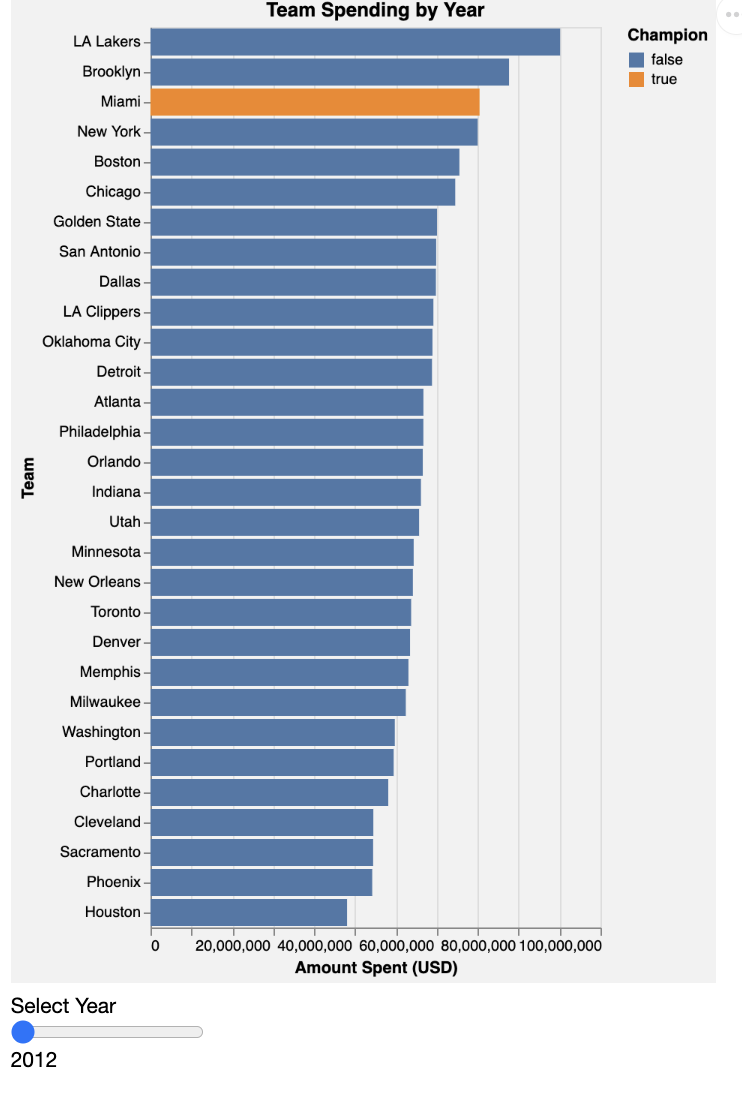

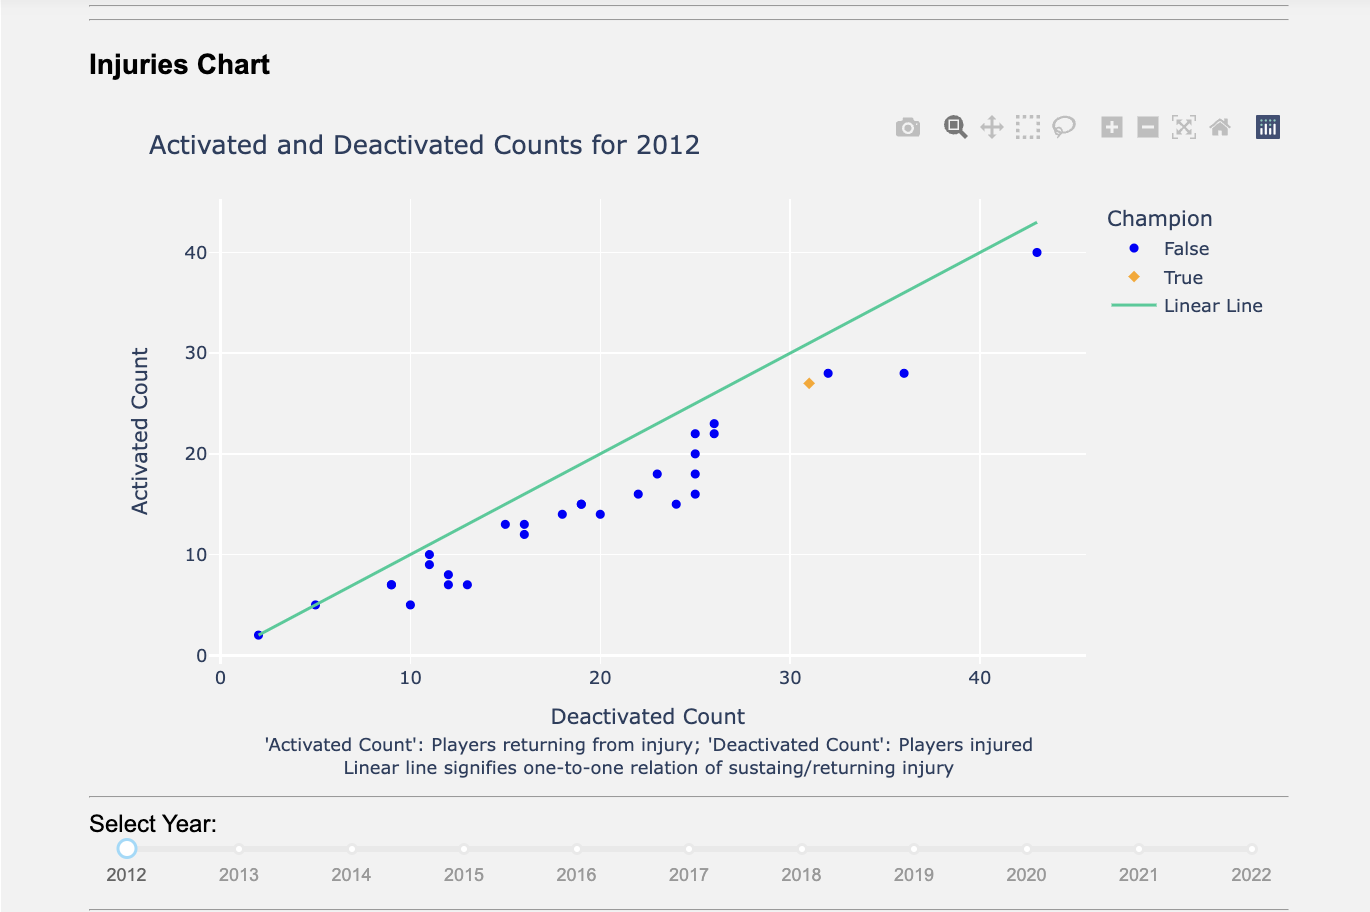

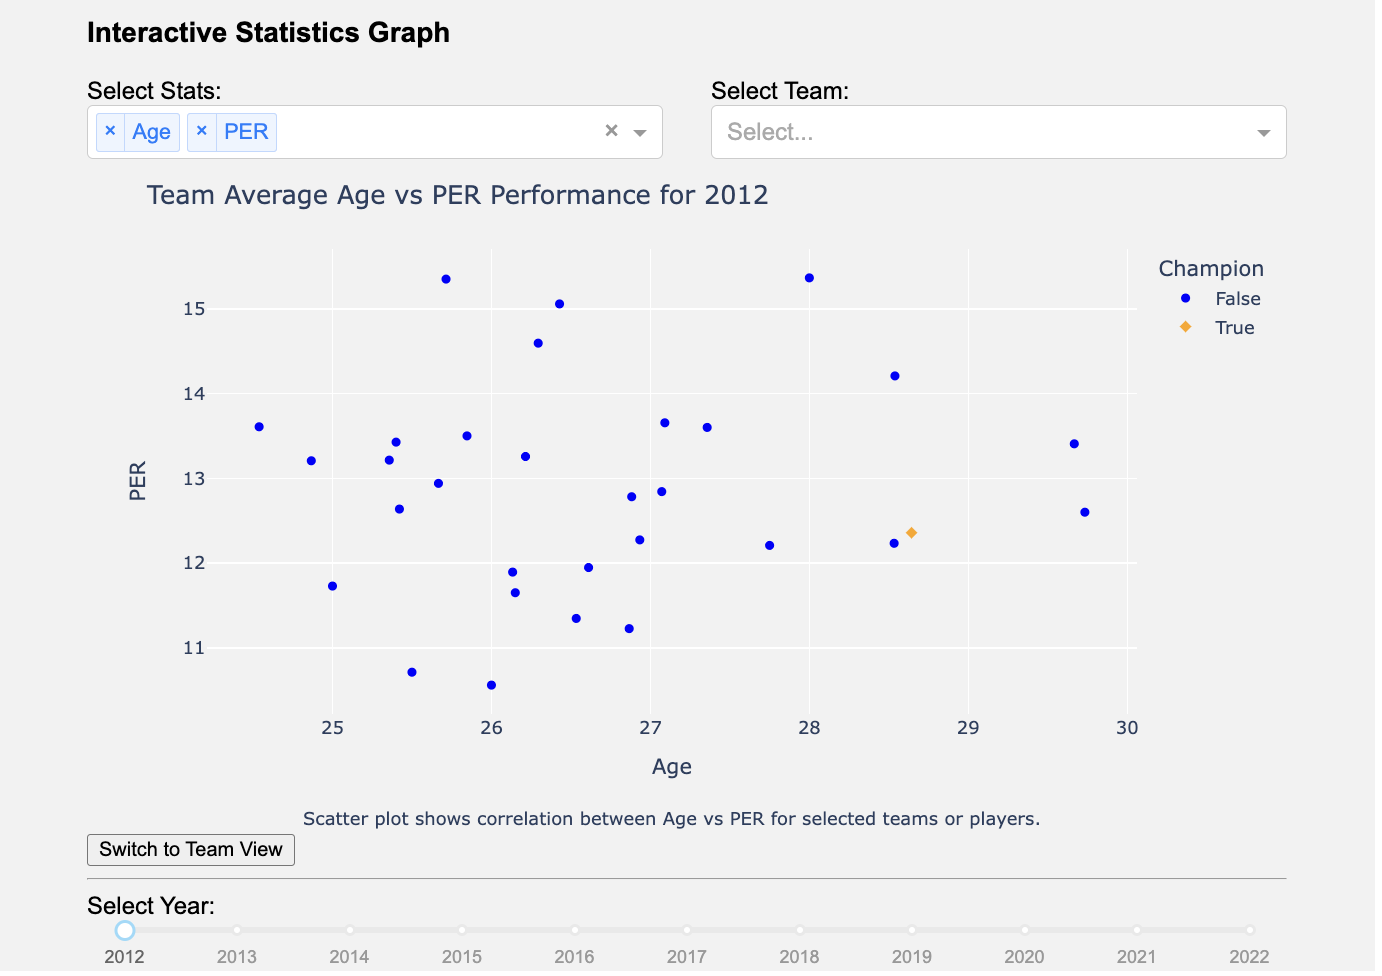

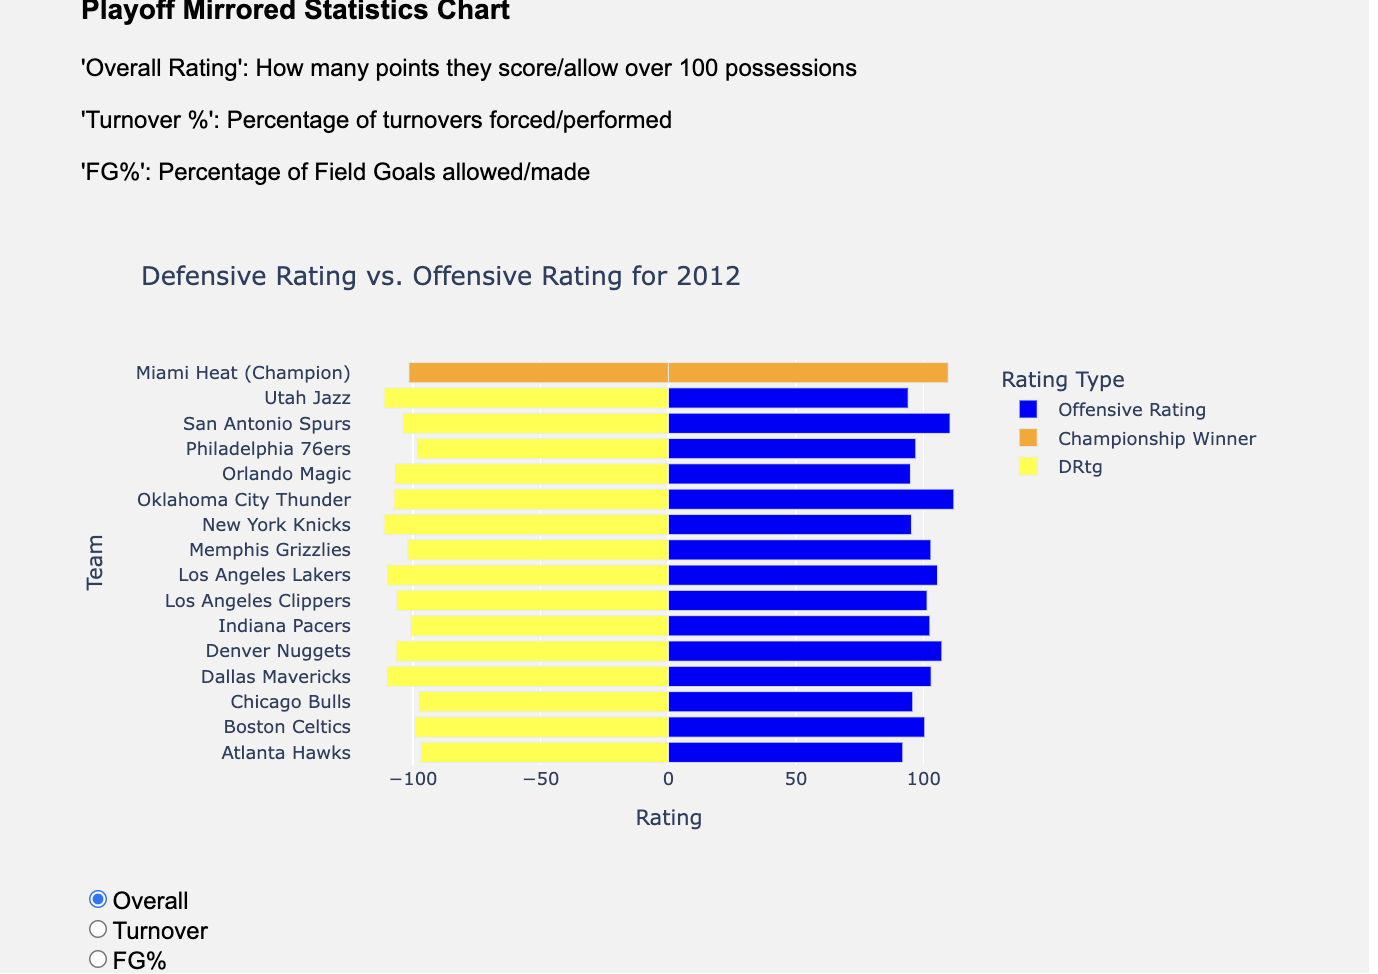

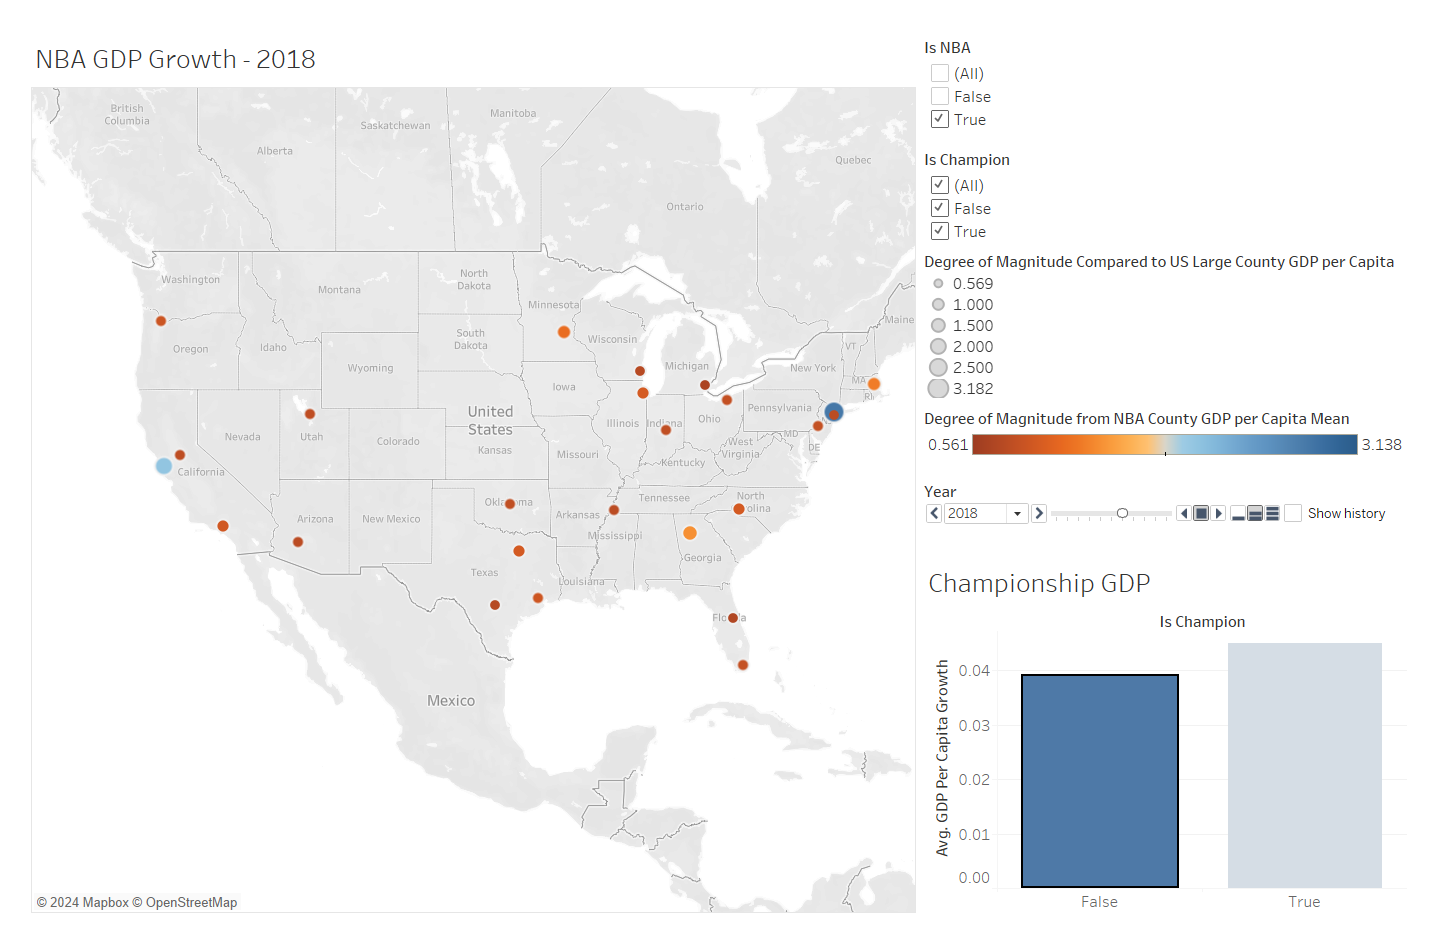